# Podstawy multimediów - ćwiczenia

Do realizacji ćwiczeń i zadań laboratoryjnych z zakresu przetwarzania danych obrazowych wykorzystywany jest Python wraz z bibliotekami NumPy, Matplotlib i OpenCV.

Pomocne tutoriale OpenCV:
[strona główna](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html),
[operacje podstawowe](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html), 
[operacje arytmetyczne](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html), 
[przetwarzanie obrazów](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html)
(m.in.:
[zmiana przestrzeni kolorów](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html#converting-colorspaces), 
[filtracja](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html#filtering),
[detekcja krawędzi](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html),
[progowanie](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html),
[operacje morfologiczne](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html),
[histogramy](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html)).



In [13]:
import time 

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Dostęp do zewnętrznych plików w środowsiku Colab

Pliki można przechowywać w folderze `sample_data` środowiska uruchomieniowego Colab - trzeba je tam wgrać, mogą zostać usunięte po zakończeniu sesji.

Można też zamontować własny dysk Google Drive.

In [3]:
##### dane w folderze środowiska uruchomieniowego
# data_dir = "/content/sample_data/" 

##### dane na Google Drive
# from google.colab import drive
# drive.mount("/content/drive")
# data_dir = "/content/drive/My Drive/Colab Notebooks/PMUT_cwiczenia/"

##### dane w lokalnym folderze - uruchamianie skrytpu .py w lokalnym środowisku
data_dir = "./images/"

# Wczytanie obrazu

Tryby wczytywania obrazu:
* `cv2.IMREAD_COLOR` - obraz wczytany zostanie jako barwny, zawsze będzie miał trzy składowe (tablica 3D), nawet jeśli jest monochromatyczny;
* `cv2.IMREAD_GRAYSCALE` - obraz wczytany zostanie jako monochromatyczny, zawsze będzie miał tylko jedną składową (tablica 2D);
* `cv2.IMREAD_UNCHANGED` - obraz wczytany zostanie '*jak jest*', barwny lub monochromatyczny.

Obraz zwracany jest jako tablica `numpy.ndarray`, można go przetwarzać jak każdą tablicę NumPy, m.in.:
* `image.shape` - wymiary obrazu: `shape[0]` - wysokość (liczba linii), `shape[1]` - szerokość (liczba pikseli w linii), `shape[2]` - liczba składowych (tylko dla obrazów barwnych);
* `image.dtype` - typ danych (liczby całkowite, liczby rzeczywiste, itp., np.: `np.uint8`, `np.float32`, `np.float64`);
* `image.min()`, `image.max()` - wartość minimalna/maksymalna.


In [25]:
image = cv2.imread(data_dir+"sailboats_col.png", cv2.IMREAD_UNCHANGED) 
# image = cv2.imread(data_dir+"sailboats_col.png", cv2.IMREAD_GRAYSCALE) 
print(f"image, wymiary: {image.shape}, typ danych: {image.dtype}, wartości: {image.min()} - {image.max()}")

image, wymiary: (768, 512, 3), typ danych: uint8, wartości: 0 - 255


# Zapis do pliku.


Format zostanie automatycznie dobrany na podstawie nazwy pliku wyjściowego.
Możliwe jest ustawienie parametrów dodatkowych, zależnych od formatu wyjściowego (np. 'jakość' dla kodera JPEG).

In [5]:
cv2.imwrite(data_dir+"out_image.png", image)
cv2.imwrite(data_dir+"out_image.jpg", image)
cv2.imwrite(data_dir+"out_image_quality50.jpg", image, (cv2.IMWRITE_JPEG_QUALITY, 50))

True

# Wyświetlanie obrazu

### Wyświetlanie z wykorzystaniem okna OpenCV

W zależności od typu danych, zakładane są różne przedziały wartości pikseli:
* dla danych `uint8` - zakładany przedział wartości to [0, 255];
* dla danych `float32`/`float64` - zakładany jest przedział wartości [0, 1], a wartości pikseli są mnożone przez 255 do wyświetlenia.

Żeby wyswietlić kilka obrazów, należy oknom nadać inny tytuł/nazwę.

In [6]:
cv2.imshow("image", image)
image_float = image.astype(np.float32) 
# image_float = image*1.  ### wykorzystanie operacji arytmetycznej do zmiany typu danych
print(f"image_float, wymiary: {image_float.shape}, typ danych: {image_float.dtype}, wartości: {image_float.min()} - {image_float.max()}")

cv2.imshow("image float _bad", image_float)  ### wyświetlony obraz będzie 'biały'
cv2.imshow("image float", image_float/255)   ### przeskalowanie wartości pikseli do przedziału [0, 1] - obraz wyświetlony prawidłowo

cv2.waitKey(0)           ### oczekiwanie na naciśnięcie klawisza lub zamknięcie okien
cv2.destroyAllWindows()  ### zniszczenie okien

image_float, wymiary: (768, 512, 3), typ danych: float32, wartości: 0.0 - 255.0


In [7]:
def cv_imshow(img, img_title="image"):
    # cv2.namedWindow(img_title, cv2.WINDOW_AUTOSIZE) # cv2.WINDOW_NORMAL
   
    ##### przeskalowanie obrazu z rzeczywistymi wartościami pikseli, żeby jedną funkcją wywietlać obrazy różnych typów
    if (img.dtype == np.float32) or (img.dtype == np.float64):
        img_ = img/255
    else:
        img_ = img
    cv2.imshow(img_title, img_)
    # cv2.waitKey(1)  ### oczekiwanie przez bardzo krótki czas - okno się wyświetli, ale program się nie zablokuje, tylko będzie kontynuowany
    cv2.waitKey(0)           ### na końcu programu - oczekiwanie na reakcję użytkownika
    cv2.destroyAllWindows()  ### należy pamiętać o zniszczeniu okien!!!

# cv_imshow(image, "image")
# cv_imshow(image_float, "image float")

# cv2.waitKey(0)           ### na końcu programu - oczekiwanie na reakcję użytkownika
# cv2.destroyAllWindows()  ### należy pamiętać o zniszczeniu okien!!!

**UWAGA:** W środowisku Colab funkcja `cv2.imshow()` została zablokowana, zamiast niej polecane jest użycie funkcji `cv2_imshow()` z pakietu `google.colab.patches`, funkcja ta przyjmuje tylko jeden argument: obraz do wyświetlenia.

In [8]:
# from google.colab.patches import cv2_imshow

# cv2_imshow(image)

# image_float = image.astype(np.float32) 
# # image_float = image*1. ### wykorzystanie operacji arytmetycznej do zmiany typu danych
# print(f"image_float, wymiary: {image_float.shape}, typ danych: {image_float.dtype}, wartości: {image_float.min()} - {image_float.max()}")

# cv2_imshow(image_float)  ### cv2_imshow wyświetla obrazy z wartościami rzeczywistymi w sposób prawidłowy

### Wyświetlanie obrazu z wykorzystaniem pakietu `matplotlib.pyplot`

Funckja `plt.imshow()` może dokonywać automatycznego skalowania wartości pikseli do pełnego przedziału wartości ('rozciągnięcie histogramu'), aby tego uniknąć należy jawnie podać minimalną i maksymalną wartość.

Funkcja `plt.show()` powoduje wyświetlenie wszystkich utworzonych okien i zablokowanie programu do czasu ich zamknięcia; wiele środowisk programistycznych (np. Spyder, PyCharm, Google Colab) potrafi wyświetlać 'okna' `matlplotlib.pyplot` w ramach swojego interfejsu graficznego - wywołanie `plt.show()` nie jest wtedy konieczne w celu wyświetlenia obrazu (może natomiast wymusić jego wyświetlenie w tym momencie), ale też obrazy wyświetlane są z reguły w ograniczonych rozmiarach - do 'dokładnego' ich oglądania warto zapisać je do pliku i otworzyć w 'zewnętrznej' przeglądarce obrazów.

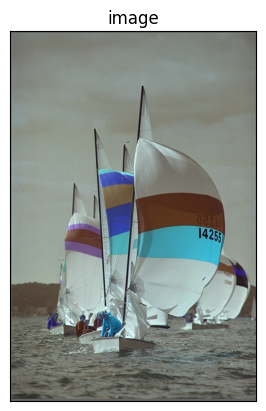

image_dark, wymiary: (768, 512, 3), typ danych: uint8, wartości: 0 - 255


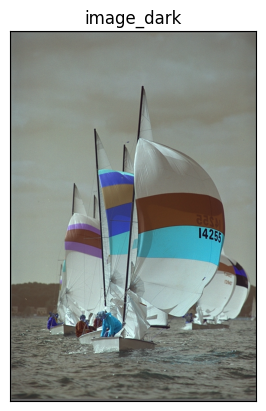

In [27]:
def plt_imshow(img, img_title="image"):
    plt.figure() 
    plt.title(img_title) 
    plt.imshow(img)  ### możliwe automatyczne skalowanie wartości pikseli
    # plt.imshow(img, cmap="gray")  ### możliwe automatyczne skalowanie wartości pikseli
    # plt.imshow(img, cmap="gray", vmin=0, vmax=255)  ### bez skalowania wartości pikseli
    plt.xticks([]), plt.yticks([])
    plt.show()

plt_imshow(image)

image_dark = cv2.imread(data_dir+"sailboats_col.png", cv2.IMREAD_UNCHANGED)
print(f"image_dark, wymiary: {image_dark.shape}, typ danych: {image_dark.dtype}, wartości: {image_dark.min()} - {image_dark.max()}")
plt_imshow(image_dark, "image_dark")

### Funkcje pomocnicze

Pomocnicze funkcje, aby można było łatwo zmieniać sposób wyświetalania obrazów i wypisywania komunikatów bez konieczności modyfikowania dalszych przykładów.

In [28]:
imshow = cv_imshow   ### wyświetlanie z użyciem cv2
# imshow = plt_imshow  ### wyświetlanie z użyciem matplotlib

# def imshow(img, img_title="image"):  ### 'opakowanie' na cv2_imshow(), żeby 'uzgodnić' parametry wywołania
#   cv2_imshow(img) 

def printi(img, img_title="image"):
    print(f"{img_title}, wymiary: {img.shape}, typ danych: {img.dtype}, wartości: {img.min()} - {img.max()}")

# Odczytywanie wartości pikseli i ich modyfikacja.

Dane zwracane przez `cv2.imread()` są tablicami pakietu NumPy (`numpy.ndarray`) i można nimi operować jak każdą inną tablicą NumPy.

Obowiązuje notacja macierzowa, czyli `[wiersz, kolumna]`. Konstrukcja '`start:end`' w określeniu indeksów do tablicy pozwala na odczyt lub modyfikację całego zakresu wierszy bądź kolumn, włącznie z wierszem/kolumną o indeksie `start`, ale już z wyłączeniem `end`. Można pominąć wartości `start` i/lub `end` - zostaną wtedy zastosowane wartości domyślne (początek danych dla `start` i ich koniec dla `end`), można też podawać wartości ujemne (co oznacza określenie indeksu od końca). Na przykład:
* `[0:50, 50:100]` - wiersze od 0 do 49 włącznie, kolumny od 50 do 99 włącznie,
* `[:50, 50:]` - wiersze od początku do 49 włącznie, kolumny od 50 do końca,
* `[:, 10:-1]` - wszystkie wiersze, kolumny od 10 do przedostatniej (pominięta 1 ostatnia kolumna),
* `[:, :]` - wszystkie wiersze i kolumny.

In [11]:
px = image[0, 0]
print(f"px = {px}")

image[0,0] = 255
print(f"img[0,0] = {image[0, 0]}")

px = [99 99 99]
img[0,0] = [255 255 255]


In [12]:
# for x in range(50):  ### zmiana wartości pojedynczych pikseli - może być nieefektywna
#     for y in range(50):
#         image[x,y] = 255

image[0:50, 0:50] = 255
image[0:25, 0:25] = np.ones((25, 25))*192  ### wymiary tablicy modyfikującej muszą być zgodne z zakresem określonym w tablicy modyfikowanej

imshow(image, "zmienione piksele")

ValueError: could not broadcast input array from shape (25,25) into shape (25,25,3)

Zalecaną metodą dostępu/modyfikacji wartości pojedynczych pikseli jest użycie metod `item()` i `itemset()`.

Metody te zawsze operują na wartościach skalarnych, więc w przypadku obrazów barwnych należy oddzielnie odczytywać/modyfikować wartość każdej składowej.


In [ ]:
val = image.item(10, 10, 1)
print(f"val: {val}")

image.itemset((10, 10, 0), 255)
image.itemset((10, 10, 1), 255)
image.itemset((10, 10, 2), 255)
image.itemset((10, 11, 0), 255)
image.itemset((10, 11, 1), 255)
image.itemset((10, 11, 2), 255)
image.itemset((11, 10, 0), 255)
image.itemset((11, 10, 1), 255)
image.itemset((11, 10, 2), 255)
# image.itemset((11, 11, 0), 0)
# image.itemset((11, 11, 1), 0)
# image.itemset((11, 11, 2), 0)

imshow(image, "zmieniony piksel")

Porównianie czasu wykonania operacji ustawiającej wartości pikseli dwoma metodami:

In [ ]:
def solaryzacja_m1(img):
    t1 = time.time()
    solarizedimg_m1 = np.zeros(img.shape, np.uint8)  ### utworzenie 'pustego' obrazu o wymaganych wymiarach
    for h in range(0, img.shape[0]):
        for w in range(0, img.shape[1]):
            if img[h][w] <= 127:
                solarizedimg_m1[h][w] = 2*img[h][w]
            else:
                solarizedimg_m1[h][w] = 2*(255-img[h][w])
    # solarizedimg_m1 = np.clip(solarizedimg_m1, 0, 255)
    t2 = time.time()
    print(f"czas metody 1: {t2-t1}")
    printi(solarizedimg_m1, "solarizedimg_m1")
    imshow(solarizedimg_m1, "solarizedimg_m1")

def solaryzacja_m2(img):
    t1 = time.time()
    solarizedimg_m2 = np.zeros(img.shape, np.uint8)
    for h in range(0, img.shape[0]):
        for w in range(0, img.shape[1]):
            val = img.item(h,w)
            if val <= 127:
                solarizedimg_m2.itemset((h, w), 2*val)
            else:
                solarizedimg_m2.itemset((h, w), 2*(255-val))
    # solarizedimg_m2 = np.clip(solarizedimg_m2, 0, 255)
    t2 = time.time()
    print(f"czas metody 2: {t2-t1}")
    printi(solarizedimg_m2, "solarizedimg_m2")
    imshow(solarizedimg_m2, "solarizedimg_m2")

def solaryzacja_fast(img):
    t1 = time.time()
    solarizedimg = np.where(img <= 127, 2 * img, 2 * (255 - img))
    solarizedimg = np.clip(solarizedimg, 0, 255).astype(np.uint8)
    t2 = time.time()
    print(f"czas metody wektorowej: {t2-t1}")
    imshow(solarizedimg, "solaryzacja_fast")

solaryzacja_m1(image) 
solaryzacja_m2(image)
solaryzacja_fast(image)

imshow(image, "oryginalny obraz")


cv2.waitKey(0)           ### na końcu programu - oczekiwanie na reakcję użytkownika
cv2.destroyAllWindows()  ### należy pamiętać o zniszczeniu okien!!!

czas metody 1: 0.8830111026763916
solarizedimg_m1, wymiary: (768, 512), typ danych: uint8, wartości: 0 - 254
czas metody 2: 0.06636238098144531
solarizedimg_m2, wymiary: (768, 512), typ danych: uint8, wartości: 0 - 254
czas metody wektorowej: 0.0010013580322265625


Do modyfikacji wartości pikseli całego obrazu można wykorzystywać operacje arytmetyczne.

**UWAGA:** ze względu na zapis wartości pikseli jako liczb całkowitych `uint8`, bardzo łatwo jest przekroczyć zakres wartości [0, 255], co skutkuje 'zniekształceniem' obrazu.


In [ ]:
# result1 = image + np.ones(image.shape, dtype=image.dtype)*32  ### przekroczenie zakresu wartości!
result1 = image + 32  ### przekroczenie zakresu wartości!
printi(result1, "image+32")
imshow(result1, "image+32")

image+32, wymiary: (768, 512, 3), typ danych: uint8, wartości: 0 - 255


In [ ]:
# result2 = image - np.ones(image.shape, dtype=image.dtype)*32  ### przekroczenie zakresu wartości!
result2 = image - 32  ### przekroczenie zakresu wartości!
printi(result2, "image-32")
imshow(result2, "image-32")

image-32, wymiary: (768, 512, 3), typ danych: uint8, wartości: 0 - 255


OpenCV dostarcza funkcje automatycznie obsługujące ograniczenie wartości do poprawnego zakresu.

In [ ]:
result_add = cv2.add(image, np.ones(image.shape, dtype=image.dtype)*128)  ### -> automatyczne ograniczenie wartości do 255!
printi(result_add, "result_add")
imshow(result_add, "result_add")

result_add, wymiary: (768, 512, 3), typ danych: uint8, wartości: 128 - 255


In [ ]:
result_subtr = cv2.subtract(image, np.ones(image.shape, dtype=image.dtype)*128)  ### -> automatyczne ograniczenie wartości do 0!!!
printi(result_subtr, "result_subtr")
imshow(result_subtr, "result_subtr")

result_subtr, wymiary: (768, 512, 3), typ danych: uint8, wartości: 0 - 127


In [ ]:
##### blending: res = A*img1 + B*img2 + C
result_blend1 = cv2.addWeighted(image, 0.1, np.ones(image.shape, dtype=image.dtype)*128, 0.9, 0)
printi(result_blend1, "result_blend1")
imshow(result_blend1, "result_blend1")

result_blend1, wymiary: (768, 512, 3), typ danych: uint8, wartości: 115 - 141


In [ ]:
##### parametrem może być również skalar (wtedy można też po prostu wykorzystać parametr C): 
result_blend2 = cv2.addWeighted(image, 1, 128, -1, 0)  ### -> image-128
# result_blend2 = cv2.addWeighted(image, 1, 0, 0, -128)  ### -> image-128
printi(result_blend2, "result_blend2")
imshow(result_blend2, "result_blend2")

result_blend2, wymiary: (768, 512, 3), typ danych: uint8, wartości: 0 - 255


# Usuwanie szumu z obrazu (*denoising*, *blurring*)

OpenCV dostarcza gotowe funkcje do usuwania szumu:
* `cv2.blur()` - filtr uśredniający (liniowy, dolnoprzepustowy),
* `cv2.GaussianBlur()` - filtr Gaussa (liniowy, dolnoprzepustowy),
* `cv2.medianBlur()` - filtr medianowy (nieliniowy).

Rozmiar maski filtru ustalany jest parametrami wywołania funkcji.
Ponadto dla filtru Gaussa można okreslić odchylenie standardowe 
(podanie wartosci `0` oznacza automatyczne wyliczenie wartości na podstawie rozmiaru maski).


#### Obraz zaszumiony szumem gaussowskim

In [41]:
image_noise = cv2.imread(data_dir+"sailboats_col_noise.png", cv2.IMREAD_UNCHANGED) 
printi(image_noise, "image_noise")
imshow(image_noise, "image_noise")

image_noise, wymiary: (768, 512, 3), typ danych: uint8, wartości: 0 - 255


In [42]:
blur_img = cv2.blur(image_noise, (3, 3))
printi(blur_img, "blur_img")
imshow(blur_img, "blur_img")

blur_img, wymiary: (768, 512, 3), typ danych: uint8, wartości: 1 - 254


In [43]:
gblur_img = cv2.GaussianBlur(image_noise, (5, 5), 0)
printi(gblur_img, "gblur_img")
imshow(gblur_img, "gblur_img")

gblur_img, wymiary: (768, 512, 3), typ danych: uint8, wartości: 7 - 251


In [44]:
median_img = cv2.medianBlur(image_noise, 3) 
printi(median_img, "median_img")
imshow(median_img, "median_img")

median_img, wymiary: (768, 512, 3), typ danych: uint8, wartości: 0 - 255


#### Obraz zaszumiony szumem impulsowym ('sól i pieprz')

In [36]:
image_inoise = cv2.imread(data_dir+"sailboats_col_inoise1.png", cv2.IMREAD_UNCHANGED) 
printi(image_inoise, "image_inoise")
imshow(image_inoise, "image_inoise")

image_inoise, wymiary: (768, 512, 3), typ danych: uint8, wartości: 0 - 255


In [88]:
blur_imgi = cv2.blur(image_inoise, (3, 3))
printi(blur_imgi, "blur_imgi")
imshow(blur_imgi, "blur_imgi")

blur_imgi, wymiary: (768, 512, 3), typ danych: uint8, wartości: 3 - 255


In [89]:
gblur_imgi = cv2.GaussianBlur(image_inoise, (5, 5), 0)
printi(gblur_imgi, "gblur_imgi")
imshow(gblur_imgi, "gblur_imgi")

gblur_imgi, wymiary: (768, 512, 3), typ danych: uint8, wartości: 10 - 254


In [90]:
median_imgi = cv2.medianBlur(image_inoise, 3) 
printi(median_imgi, "median_imgi")
imshow(median_imgi, "median_imgi")

median_imgi, wymiary: (768, 512, 3), typ danych: uint8, wartości: 0 - 255


#### Obliczenie PSNR

In [ ]:
def calcPSNR(img1, img2):
  imax = 255.**2  ### zakładana wartość pikseli z przedziału [0, 255]
  ##### w różnicy obrazów istotne są wartości ujemne, dlatego img1 konwertowany do typu np.float64 (liczby rzeczywiste) aby nie ograniczać wyniku do przedziału [0, 255]
  mse = ((img1.astype(np.float64)-img2)**2).sum()/img1.size  ### img1.size - liczba elementów w img1, ==img1.shape[0]*img1.shape[1] dla obrazów mono, ==img1.shape[0]*img1.shape[1]*img1.shape[2] dla obrazów barwnych
  return 10.0*np.log10(imax/mse)

image = cv2.imread(data_dir+"lena_mono.png", cv2.IMREAD_UNCHANGED)
psnr = calcPSNR(image, gblur_img)
print(psnr)
psnr = calcPSNR(image, gblur_imgi)
print(psnr)
psnr = calcPSNR(image, median_imgi)
print(psnr)

# Detekcja krawędzi w obrazie

OpenCV dostarcza gotowe funkcje do wykrywania krawędzi w obrazie:
* `cv2.Sobel()` - bazującą na gradiencie (pierwsza pochodna) wartości pikseli,
* `cv2.Laplacian()` - bazującą na laplasjanie (druga pochodna) wartości pikseli.

Specyfiką tego typu operacji jest to, że w wyniku moga pojawić się również wartości ujemne, dlatego należy ustalić format danych wynikowych np. na liczby rzeczywiste (np. `cv2.CV_64F` lub `cv2.CV_32F`, co odpowiada `np.float64` i `np.float32` odpowiednio), aby te wartości nie zostały 'zgubione'.

Operacja detekcji krawędzi jest bardzo czuła na szum występujący w obrazie (generowanych jest wiele 'mikrokrawędzi'), dlatego czasami warto poddać obraz wcześniejszej operacji wygładzania.

**UWAGA:** do wyświetlania obrazów brana jest wartość bezwzględna pikseli (`np.abs()`). Nie należy jednak tego robić w każdej sytuacji, jeśli obraz krawędziowy ma być wykorzystywany później do innych operacji (np. wyostrzania obrazu), to informacja o znaku jest bardzo istotna i nie może zostać utracona czy zmodyfikowana!


In [ ]:
image = cv2.imread(data_dir+"lena_mono.png", cv2.IMREAD_UNCHANGED)
# image = cv2.imread(data_dir+"lena_mono_noise.png", cv2.IMREAD_UNCHANGED)
# image = cv2.imread(data_dir+"lena_mono_inoise.png", cv2.IMREAD_UNCHANGED)

In [ ]:
sobx_img = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)/4  ### gradient w kierunku x - krawędzie pionowe
soby_img = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)/4  ### gradient w kierunku y - krawędzie poziome
printi(sobx_img, "sobx_img")
printi(soby_img, "soby_img")
imshow(np.abs(sobx_img), "sobx_img")
imshow(np.abs(soby_img), "soby_img")

In [ ]:
##### suma gradientów - pełna informacja o krawędziach; wartości pikseli jako liczby rzeczywiste - nie ma niebezpieczeństwa przekroczenia zakresu
sob_img = sobx_img + soby_img 
printi(sob_img, "sob_img")
imshow(np.abs(sob_img), "sob_img")


In [ ]:
sob_img2 = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)  ### gradienty w kierunku x i y
printi(sob_img2, "sob_img2")
imshow(np.abs(sob_img2), "sob_img2")

In [ ]:
lap_img = cv2.Laplacian(image, cv2.CV_64F) 
printi(lap_img, "lap_img")
imshow(np.abs(lap_img), "lap_img")

OpenCV dostarcza również gotową implementację algorytmu Canny'ego detekcji krawędzi, którego rezultatem jest nie 'surowy' obraz gradientowy, lecz wynik wieloetapowego procesu wykrywania i przetwarzania krawędzi w postaci obrazu binarnego, na którym krawędzie oznaczone są białymi pikselami. (Więcej: 
[opis algorytmu Canny'ego w OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html) )


In [ ]:
canny_img = cv2.Canny(image, 75, 200)
printi(canny_img, "canny_img")
imshow(canny_img, "canny_img")

# Generyczna filtracja obrazu

OpenCV dostarcza również generyczną funkcję do liniowej filtracji obrazu filtrem o danej masce: `cv2.filter2D()`.
Paremetry tej funkcji pozwalają określić typ danych wyjściowych (np. `cv2.CV_8U` - liczby całkowite z przedziału [0, 255], `cv2.CV_64F`, `cv2.CV_32F` - liczby rzeczywiste 64- lub 32-bitowej precyzji; podanie wartości `-1` oznacza wynik takiego samego typu jak dane w obrazie wejściowym), oraz maskę filtru.


#### Filtracja filtrem dolnoprzepustowym o rozmiarze 5x5, będącym przybliżeniem filtru Gaussa

In [ ]:
mask_low = np.array([
    [1,  4,  7,  4, 1], 
    [4, 20, 33, 20, 4], 
    [7, 33, 55, 33, 7], 
    [4, 20, 33, 20, 4], 
    [1,  4,  7,  4, 1]], np.float32)
mask_low = mask_low/mask_low.sum()  ### normalizacja maski filtru

lowpass_img = cv2.filter2D(image, -1, mask_low)  ### '-1' -> dane wyjściowe w takim samym formacie jak dane wejściowe
printi(lowpass_img, "lowpass_img")
imshow(lowpass_img, "lowpass_img")

#### Filtracja filtrem górnoprzepustowym - laplasjan w czterech kierunkach

In [ ]:
mask_lap = np.array([
    [-1, -1, -1], 
    [-1,  8, -1], 
    [-1, -1, -1]], np.float32)

highpass_img = cv2.filter2D(image, cv2.CV_64F, mask_lap)  ### ustalony format danych wyjściowych na liczby rzeczywiste, ze względu na wartości ujemne w wyniku filtracji górnoprzepustowej
printi(highpass_img, "highpass_img")
imshow(np.abs(highpass_img), "highpass_img")

# Operacje morfologiczne

OpenCV dostarcza gotowe funkcje do wykonywania operacji morfologicznych na obrazie:
* `cv2.erode()` - erozja,
* `cv2.dilate()` - dylacja
* `cv2.morphologyEx()` - bardziej złożone operacje, m.in. otwarcie, domknięcie, gradient.

Parametry funkcji pozwalają określić jądro (maskę) operacji, nie podanie żadnej oznacza wykorzystanie domyślnej maski o rozmiarach 3x3.

Operacje morfologiczne z reguły wykonywane są dla obrazów binarnych. Binaryzacji obrazu monochromatycznego można dokonać prostymi operacjami modyfikacji wartości oraz funkcjami z pakietu NumPy, ale OpenCV dostarcza również gotowe funkcje, pozwalające na progowanie obrazu na różne sposoby (nie w każdym trybie progowania wynikiem będzie obraz binarny): `cv2.threshold()` oraz `cv2.adaptiveThreshold()`.

In [ ]:
binary_img = np.where(image >= 128, np.uint8(255), np.uint8(0))  ### wymuszenie liczb 8-bitowych -> np.uint8()
printi(binary_img, "binary_img")
imshow(binary_img, "binary_img")

th_val, thresh_img = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)  ### w niektórych trybach próg jest wyznaczany automatycznie i funkcja zwraca jego wartość
printi(thresh_img, "thresh_img")
imshow(thresh_img, "thresh_img")

adaptth_img = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)  ### przydatne szczegółnie przy "nierównym" oświetleniu w obrazie
printi(adaptth_img, "adaptth_img")
imshow(adaptth_img, "adaptth_img")

In [ ]:
erode_img = cv2.erode(thresh_img, None)
printi(erode_img, "erode_img")
imshow(erode_img, "erode_img")

morph_kernel = np.ones((5, 5), dtype=np.uint8)
dilate_img = cv2.dilate(thresh_img, morph_kernel)
printi(dilate_img, "dilate_img")
imshow(dilate_img, "dilate_img")

open_close_img = cv2.morphologyEx(cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, None), cv2.MORPH_CLOSE, None)  ### cv2.MORPH_GRADIENT, cv2.MORPH_ERODE, cv2.MORPH_DILATE
printi(open_close_img, "open_close_img")
imshow(open_close_img, "open_close_img")

# Wyznaczanie i rysowanie histogramu

W pakiecie `matplotlib.pyplot` jest gotowa funkcja, która obliczy i narysuje histogram: `plt.hist()` (jeśli nie chce się rysować histogramu, a tylko go policzyć, można skorzystać z analogicznej funkcji w pakiecie `numpy`: `np.histogram()`).

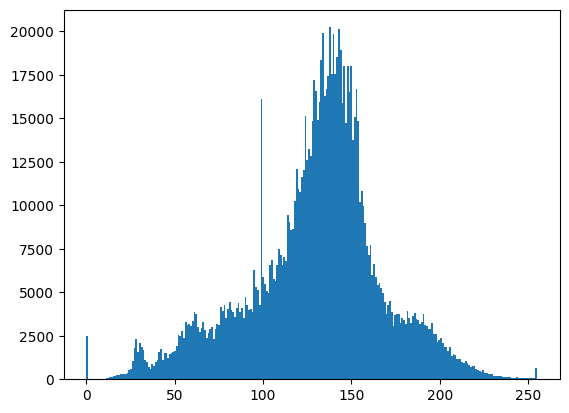

In [98]:
plt.figure()
hist_plt = plt.hist(image.flatten(), 256, range=[0.0, 255.0])
# print(hist_plt[0])

OpenCV również dostarcza funkcję do wyznaczenia histogramu (ma być dużo szybsza): `cv2.calcHist()`.

`cv2.calcHist()` może wyznaczyć histogram dla wielu obrazów równocześnie, dlatego parametry tej funkcji przekazuje się jako tablice.

`cv2.calcHist()` zwraca wynik w postaci tablicy dwuwymiarowej, konwersji na tablicę jednowymiarową można dokonać za pomocą funkcji `np.flatten()`.

Ze względu na inny sposób traktowania górnego kresu zakresu zmienności wartości pikseli, zakres wartości dla `cv2.calcHist()` należy okrelić jako [0, 256], aby uzyskać wynik identyczny jak dla `plt.hist()` i zakresu [0, 255].

Do narysowania najwygodniej jest wykorzystać również `matplotlib.pyplot`.


suma różnic wartosci histogramów: 786432.0


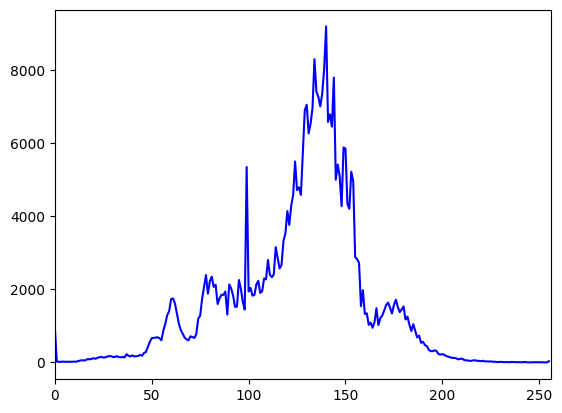

In [94]:
hist_cv = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_cv = hist_cv.flatten()
# print(hist_cv)
print(f"suma różnic wartosci histogramów: {np.abs(hist_cv.flatten()-hist_plt[0]).sum()}")

plt.figure()
plt.plot(hist_cv, color="blue")
plt.xlim([0,256])
plt.show()

### Wyrównanie histogramu

In [1]:
image = cv2.imread(data_dir+"lena_mono.png", cv2.IMREAD_UNCHANGED)
printi(image, "image")
imshow(image, "image")

equ_img = cv2.equalizeHist(image)
printi(equ_img, "equ_img")
imshow(equ_img, "equ_img")

NameError: name 'cv2' is not defined

In [ ]:
image_dark = cv2.imread(data_dir+"lena_mono_dark.png", cv2.IMREAD_UNCHANGED)
printi(image_dark, "image_dark")
imshow(image_dark, "image_dark")

equ_imgdark = cv2.equalizeHist(image_dark)
printi(equ_imgdark, "equ_imgdark")
imshow(equ_imgdark, "equ_imgdark")

# Obrazy barwne

#### Przykłady przedstawionych  wcześniej operacji zastosowanych do obrazu barwnego

In [ ]:
colimage = cv2.imread(data_dir+"lena_col.png")
printi(colimage, "colimage")
imshow(colimage, "colimage")

In [ ]:
col_neg = 255-colimage  ### negatyw
printi(col_neg, "col_neg")
imshow(col_neg, "col_neg")

In [ ]:
col_gblur = cv2.GaussianBlur(colimage, (9, 9), 0)
printi(col_gblur, "col_gblur")
imshow(col_gblur, "col_gblur")

col_mblur = cv2.medianBlur(colimage, 7)
imshow(col_mblur)

In [ ]:
col_edgesx = cv2.Sobel(colimage, cv2.CV_64F, 1, 0, ksize=3)/4
col_edgesy = cv2.Sobel(colimage, cv2.CV_64F, 0, 1, ksize=3)/4
printi(col_edgesx, "col_edgesx")
printi(col_edgesy, "col_edgesy")
imshow(col_edgesx, "col_edgesx")
imshow(col_edgesy, "col_edgesy")

In [ ]:
col_lapl = cv2.Laplacian(colimage, cv2.CV_64F) 
printi(col_lapl, "col_lapl")
imshow(np.abs(col_lapl), "col_lapl")

In [ ]:
col_canny = cv2.Canny(colimage, 75, 150)
printi(col_canny, "col_canny")
imshow(col_canny, "col_canny")

In [ ]:
col_lowpass = cv2.filter2D(colimage, -1, mask_low)  #'-1' - dane wyjsciowe w takim samym formacie jak dane wejsciowe
printi(col_lowpass, "col_lowpass")
imshow(col_lowpass, "col_lowpass")

## Konwersja przestrzeni kolorów

Konwersja z BGR (domyślny format w OpenCV) do HSV.

Dostępne są dwa typy konwersji:
* `cv2.COLOR_BGR2HSV` - zakres wartości H to [0, 179]
* `cv2.COLOR_BGR2HSV_FULL` - zakres wartości H to [0, 255]

W pierwszym przypadku, przy samodzielnej modyfikacji wartości H należy zadbać o odpowiednie ich ograniczenie do przedziału [0, 179] (wartość `180` przechodzi w `0`, wartosć `-1` - w `179`) przy jednoczesnym nieprzekroczeniu zakresu [0, 255] (zakres typu `uint8`).

W drugim przypadku modyfikacje wartosci H w sposób automatyczny są 'zawijane' w przedziale [0, 255] i mogą być prostsze w zapisie.

Dla wartosci S i V obie konwersje sa równoważne.


#### Modyfikacja nasycenia

In [ ]:
col_hsv = cv2.cvtColor(colimage, cv2.COLOR_BGR2HSV)
col_hsv[:, :, 1] = cv2.multiply(col_hsv[:, :, 1], 2)
col_sat = cv2.cvtColor(col_hsv, cv2.COLOR_HSV2BGR)
imshow(col_sat, "col_sat")

#### Modyfikacja odcienia

In [ ]:
col_hsv = cv2.cvtColor(colimage, cv2.COLOR_BGR2HSV_FULL)
col_hsv[:, :, 0] += 90  ### nie cv2.add() albo podobna, bo nie chcemy 'obcięcia' wartości, a właśnie ich 'zawinięcia'
col_hue = cv2.cvtColor(col_hsv, cv2.COLOR_HSV2BGR_FULL)
imshow(col_hue, "col_hue")

#### Modyfikacja jasności

In [ ]:
col_hsv = cv2.cvtColor(colimage, cv2.COLOR_BGR2HSV)
col_hsv[:, :, 2] = cv2.subtract(col_hsv[:, :, 2], 64)  ### a tu właśnie 'obcięcie' jest pożądane
col_val = cv2.cvtColor(col_hsv, cv2.COLOR_HSV2BGR)
imshow(col_val, "col_val")

#### Efekt sepii (lub dowolnego innego koloru)

In [ ]:
##### można wykorzystać obraz monochromatyczny (jedna składowa) i dokonać jego konwersji na obraz 'barwny' (trzy składowe, wszystkie o takiej samej wartości)
# image = cv2.imread("lena_mono.png", cv2.IMREAD_UNCHANGED)
# image_gray = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

##### można też obraz monochromatyczny od razu wczytać jako 'barwny' (obraz barwny należy najpierw skonwertować na szaroodcieniowy)
image_gray = cv2.imread(data_dir+"lena_mono.png", cv2.IMREAD_COLOR) 

imshow(image_gray, "image_gray")

In [ ]:
image_hsv = cv2.cvtColor(image_gray, cv2.COLOR_BGR2HSV)
image_hsv[:, :, 0] = 25  ### trzeba ustawić odcień...
image_hsv[:, :, 1] = 96  ### oraz nasycenie
image_col = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
imshow(image_col, "image_col")

#### Paleta barw HSV

In [ ]:
def generateHSVCircle(rad):  ### wersja z obliczaniem wartości dla każdego piskela
    ##### rad - promień palety
    sz = 2*rad+1   ### całkowity rozmiar (szerokość i wysokość) obrazu wynikowego
    cx = cy = rad  ### centrum palety w obrazie
    
    img_hsv = np.zeros((sz, sz, 3), dtype=np.uint8)  ### pusty obraz o pożądanych rozmiarach

    for x in range(0, sz, 1):
        for y in range(0, sz, 1):
            dist = np.sqrt((x-cx)**2 + (y-cy)**2)
            if dist > rad: 
                img_hsv.itemset((y, x, 0), 0)
                img_hsv.itemset((y, x, 1), 0)
                img_hsv.itemset((y, x, 2), 0)
            else:
                hue = np.degrees(np.arctan2(cy-y, x-cx))  ### np.arctan() daje wartości [-180, 180]...
                hue = np.round(hue/2)%180                 ### ...a potrzebne są [0, 180], dlatego '/2' i '%180' (% 'poprawi' zarówno ujemne, jak i zmieni 180 na 0)
                img_hsv.itemset((y, x, 0), hue)                     ### hue: zależnie od kąta, od 0 do 179 (180 to znowu 0)
                img_hsv.itemset((y, x, 1), np.round(dist/rad*255))  ### nasycenie: na brzegu max (255), maleje do 0 w środku
                img_hsv.itemset((y, x, 2), 255)                     ### value: zawsze max
    
    return cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

def generateHSVCircle_v2(rad):  ### wersja z obliczeniami na macierzach (szybsza, ale zapis może mniej 'czytelny')
    ##### rad - promień palety
    sz = 2*rad+1   ### całkowity rozmiar (szerokość i wysokość) obrazu wynikowego
    cx = cy = rad  ### centrum palety w obrazie
    
    img_hsv = np.zeros((sz, sz, 3), dtype=np.uint8)  ### pusty obraz o pożądanych rozmiarach
    
    xx = np.tile(np.arange(-rad, rad+1, 1), (sz,1))
    yy = xx.T
    angles = np.degrees(np.arctan2(-yy, xx))  ### np.arctan() daje wartosci [-180, 180]...
    dists = np.sqrt(xx**2 + yy**2)

    img_hsv[:,:,0] = np.round(angles/2)%180                             ### ...a Hue ma wartości [0, 180], dlatego '/2' i '%180' (% 'poprawi' zarówno wartości ujemne, jak i zmieni 180 na 0)
    img_hsv[:,:,1] = np.where(dists > rad, 0, np.round(dists/rad*255))  ### nasycenie: na brzegu max (255), maleje do 0 w środku, poza paletą też 0
    img_hsv[:,:,2] = np.where(dists > rad, 0, 255)                      ### value: w palecie zawsze max, poza paletą 0
    
    return cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

t1 = time.time()
hsv_cir = generateHSVCircle_v2(256)
t2 = time.time()
print(f"czas: {t2-t1}")
imshow(hsv_cir, "hsv_cir")

## Wyrównanie histogramu

`cv2.equalizeHist()` wymaga obrazów monochromatycznych (z jedną składową). 

Wyrównanie histogramu wykonane osobno dla każdej ze składowych RGB obrazu barwnego powoduje '*zniekształcenie*' barw w obrazie. Dla obrazów barwnych operację tę wykonuje się tylko dla składowej opisującej jasność, np. składowej Y w YCrCb/YUV (`cv2.COLOR_BGR2YCrCb` lub `cv2.COLOR_BGR2YUV`) - operacja do samodzielnego wykonania.

In [ ]:
# equ_img = cv2.equalizeHist(colimage)  ### -> błąd wykonania

In [ ]:
equ_colimg = np.zeros(colimage.shape, dtype=colimage.dtype)  ### 'pusty' obraz wynikowy 

equ_colimg[:,:,0] = cv2.equalizeHist(colimage[:,:,0])  ### B -> cv2.imread() zwraca obrazy w formacie BGR
equ_colimg[:,:,1] = cv2.equalizeHist(colimage[:,:,1])  ### G
equ_colimg[:,:,2] = cv2.equalizeHist(colimage[:,:,2])  ### R

imshow(equ_colimg, "equ_colimg")